# Global Cost of Living

About Dataset
This dataset contains information about the cost of living in almost 5000 cities across the world. The data were gathered by scraping Numbeo's website (https://www.numbeo.com).


|Column     | Description|
------------|-------------|
|city	    |Name of the city|
|country	|Name of the country|
|x1	        |Meal, Inexpensive Restaurant (USD)|
|x2	        |Meal for 2 People, Mid-range Restaurant, Three-course (USD)|
|x3	        |McMeal at McDonalds (or Equivalent Combo Meal) (USD)|
|x4	        |Domestic Beer (0.5 liter draught, in restaurants) (USD)|
|x5	        |Imported Beer (0.33 liter bottle, in restaurants) (USD)|
|x6	        |Cappuccino (regular, in restaurants) (USD)|
|x7	        |Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)|
|x8	        |Water (0.33 liter bottle, in restaurants) (USD)|
|x9	        |Milk (regular), (1 liter) (USD)|
|x10	    |Loaf of Fresh White Bread (500g) (USD)|
|x11	    |Rice (white), (1kg) (USD)|
|x12	    |Eggs (regular) (12) (USD)|
|x13	    |Local Cheese (1kg) (USD)|
|x14	    |Chicken Fillets (1kg) (USD)|
|x15	    |Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)|
|x16	    |Apples (1kg) (USD)|
|x17	    |Banana (1kg) (USD)|
|x18	    |Oranges (1kg) (USD)|
|x19	    |Tomato (1kg) (USD)|
|x20	    |Potato (1kg) (USD)|
|x21	    |Onion (1kg) (USD)|
|x22	    |Lettuce (1 head) (USD)|
|x23	    |Water (1.5 liter bottle, at the market) (USD)|
|x24	    |Bottle of Wine (Mid-Range, at the market) (USD)|
|x25	    |Domestic Beer (0.5 liter bottle, at the market) (USD)|
|x26	    |Imported Beer (0.33 liter bottle, at the market) (USD)|
|x27	    |Cigarettes 20 Pack (Marlboro) (USD)|
|x28	    |One-way Ticket (Local Transport) (USD)|
|x29	    |Monthly Pass (Regular Price) (USD)|
|x30	    |Taxi Start (Normal Tariff) (USD)|
|x31	    |Taxi 1km (Normal Tariff) (USD)|
|x32	    |Taxi 1hour Waiting (Normal Tariff) (USD)|
|x33	    |Gasoline (1 liter) (USD)|
|x34	    |Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD)|
|x35	    |Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD)|
|x36	    |Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD)|
|x37	    |1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD)|
|x38	    |Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)|
|x39	    |Fitness Club, Monthly Fee for 1 Adult (USD)|
|x40	    |Tennis Court Rent (1 Hour on Weekend) (USD)|
|x41	    |Cinema, International Release, 1 Seat (USD)|
|x42	    |Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD)|
|x43	    |International Primary School, Yearly for 1 Child (USD)|
|x44	    |1 Pair of Jeans (Levis 501 Or Similar) (USD)|
|x45	    |1 Summer Dress in a Chain Store (Zara, H&M, …) (USD)|
|x46	    |1 Pair of Nike Running Shoes (Mid-Range) (USD)|
|x47	    |1 Pair of Men Leather Business Shoes (USD)|
|x48	    |Apartment (1 bedroom) in City Centre (USD)|
|x49	    |Apartment (1 bedroom) Outside of Centre (USD)|
|x50	    |Apartment (3 bedrooms) in City Centre (USD)|
|x51	    |Apartment (3 bedrooms) Outside of Centre (USD)|
|x52	    |Price per Square Meter to Buy Apartment in City Centre (USD)|
|x53	    |Price per Square Meter to Buy Apartment Outside of Centre (USD)|
|x54	    |Average Monthly Net Salary (After Tax) (USD)|
|x55	    |Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate|
|data_quality |	0 if Numbeo considers that more contributors are needed to increase data quality, else 1|




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('region_cost-of-living_v2.csv')

df.shape, df

((4956, 59),
              region      country                city     x1     x2     x3  \
 0              ASIA  South Korea               Seoul   7.68  53.78   6.15   
 1              ASIA        China            Shanghai   5.69  39.86   5.69   
 2              ASIA        China           Guangzhou   4.13  28.47   4.98   
 3              ASIA        India              Mumbai   3.68  18.42   3.68   
 4              ASIA        India               Delhi   4.91  22.11   4.30   
 ...             ...          ...                 ...    ...    ...    ...   
 4951        OCEANIA    Australia        Peterborough    NaN    NaN    NaN   
 4952        OCEANIA    Australia          Georgetown    NaN    NaN    NaN   
 4953  NORTH AMERICA       Mexico  Ixtapa Zihuatanejo   5.16  30.94  12.89   
 4954  NORTH AMERICA       Canada             Iqaluit  29.65  74.27  13.71   
 4955        OCEANIA        Tonga              Neiafu    NaN  29.79  10.64   
 
          x4    x5    x6    x7  ...     x47      

In [3]:
df_good = df[df["data_quality"] == 1] # data quality == 1 to filter for the good data

df_good.shape

(923, 59)

### Check for missing values

In [4]:
# Count the number of null values in each column
null_counts = df_good.isnull().sum()

# Select only the columns with null values
null_cols = null_counts[null_counts > 0].index

# Print the null columns and their respective null counts
df_good[null_cols].isnull().sum()

x4      1
x5      1
x7      1
x12     1
x14     1
x19     3
x24     2
x25     3
x26     4
x27     2
x28     1
x29    13
x30     2
x31     5
x32    22
x34     4
x35    10
x37    28
x40    18
x41     1
x42    11
x43    75
x46     1
x52    21
x53    25
x54     1
x55    13
dtype: int64

### Remove NaN Values

In [5]:
df_good.dropna(inplace=True)
df_good.isnull().sum()

/var/folders/8l/0kb39xlx2tn3t6kvn8j3v1jm0000gn/T/ipykernel_12469/2797711189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good.dropna(inplace=True)


region          0
country         0
city            0
x1              0
x2              0
x3              0
x4              0
x5              0
x6              0
x7              0
x8              0
x9              0
x10             0
x11             0
x12             0
x13             0
x14             0
x15             0
x16             0
x17             0
x18             0
x19             0
x20             0
x21             0
x22             0
x23             0
x24             0
x25             0
x26             0
x27             0
x28             0
x29             0
x30             0
x31             0
x32             0
x33             0
x34             0
x35             0
x36             0
x37             0
x38             0
x39             0
x40             0
x41             0
x42             0
x43             0
x44             0
x45             0
x46             0
x47             0
x48             0
x49             0
x50             0
x51             0
x52             0
x53       

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ Search for Outliers using Interquartile Range@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

## CONTINENT: Average Monthly Net Salary (USD) - After Tax 

In [6]:
df_good_region = df_good[['region','country','x54']]

In [7]:
'''
For each region I want to calculate the average value

For each unique region, 
    return the mean of x54
'''
unique_region = df_good_region['region'].unique()


avg_income_dict = {}
for avg_region in unique_region:
   
   region_df = df_good_region.loc[df_good_region['region'] == avg_region]
   
   region_mean = region_df['x54'].mean()
   
   avg_income_dict.update({avg_region:region_mean})
   
   print(f'For {avg_region} the average USD net income is ${region_mean:.2f} per month)')
avg_income_dict = dict(sorted(avg_income_dict.items(), key=lambda x: x[1], reverse=True))
avg_income_dict

For ASIA the average USD net income is $732.46 per month)
For AFRICA the average USD net income is $436.42 per month)
For SOUTH AMERICA the average USD net income is $580.25 per month)
For NORTH AMERICA the average USD net income is $3852.60 per month)
For WESTERN EUROPE the average USD net income is $2602.53 per month)
For MIDDLE EAST the average USD net income is $1863.07 per month)
For OCEANIA the average USD net income is $3460.55 per month)
For EASTERN EUROPE the average USD net income is $823.68 per month)
For EUROPE the average USD net income is $1032.54 per month)


{'NORTH AMERICA': 3852.6049218750004,
 'OCEANIA': 3460.5463157894737,
 'WESTERN EUROPE': 2602.526103286385,
 'MIDDLE EAST': 1863.067419354839,
 'EUROPE': 1032.5362162162164,
 'EASTERN EUROPE': 823.6795890410959,
 'ASIA': 732.4553691275169,
 'SOUTH AMERICA': 580.2528846153847,
 'AFRICA': 436.4202380952381}

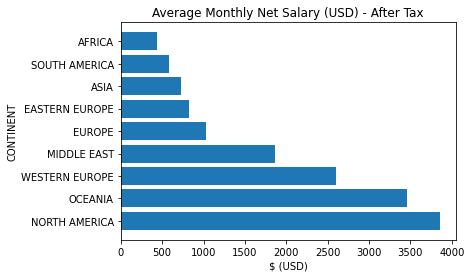

In [8]:
title = "Average Monthly Net Salary (USD) - After Tax"
xlabel = "$ (USD)"
ylabel = "CONTINENT"

plt.barh(list(avg_income_dict.keys()), list(avg_income_dict.values()))
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.show()

### North America

In [9]:
def region_country_filter(excl_list:None,data, region_filter):

    if excl_list == None:
        df_country_filter = data[(data['region'] == region_filter)]
    else:    
        df_country_filter = data[(data['region'] == region_filter) & (~data['country'].isin(excl_list))]

    return df_country_filter

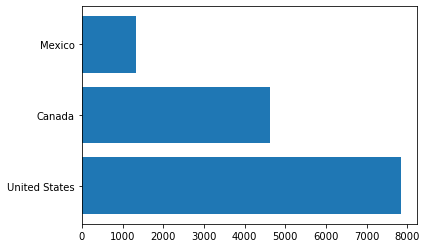

In [10]:
def avg_month_net_sal(data):
    sorted_data = data.sort_values(by='x54', ascending=False)
    title="Average Monthly Net Salary (USD) - After Tax"
    xlabel = "$ (USD)"
    ylabel = "CONTINENT"
    fig = plt.barh(sorted_data['country'],sorted_data['x54'])
    
    return plt.show()


df_good_region_AM = region_country_filter(None,df_good_region,'NORTH AMERICA')

avg_month_sal_AM = avg_month_net_sal(df_good_region_AM)



### Asia (excluding Singapore, Brunei, Taiwan, Hong Kong, Japan, South Korea, China)

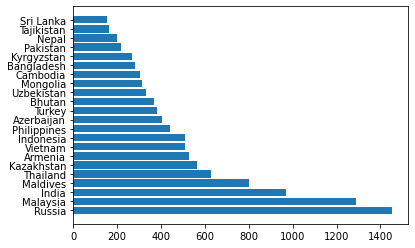

In [11]:
excl_as = ['Singapore', 'Brunei','Taiwan','Hong Kong','Japan','South Korea','China']
df_good_region_AS = region_country_filter(excl_as,df_good_region,'ASIA')
avg_month_sal_AS = avg_month_net_sal(df_good_region_AS)

### Africa (excl. South Africa)

In [12]:
df_good_region['region'].unique()

array(['ASIA', 'AFRICA', 'SOUTH AMERICA', 'NORTH AMERICA',
       'WESTERN EUROPE', 'MIDDLE EAST', 'OCEANIA', 'EASTERN EUROPE',
       'EUROPE'], dtype=object)

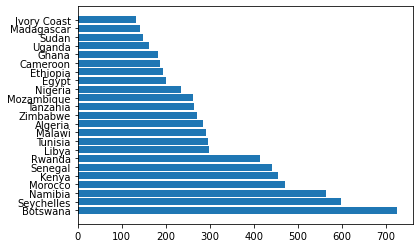

In [13]:
df_good_region_AF = region_country_filter(['South Africa'],df_good_region, 'AFRICA')
avg_month_net_sal_AF = avg_month_net_sal(df_good_region_AF)

### South America (excl. Bahamas, Bermuda)

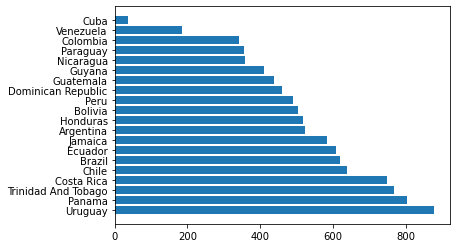

In [14]:
df_good_region_SA = region_country_filter(['Bahamas','Bermuda'],df_good_region, 'SOUTH AMERICA')
avg_month_net_sal_SA = avg_month_net_sal(df_good_region_SA)

### Western Europe

In [15]:
df_good_region['region'].unique()

array(['ASIA', 'AFRICA', 'SOUTH AMERICA', 'NORTH AMERICA',
       'WESTERN EUROPE', 'MIDDLE EAST', 'OCEANIA', 'EASTERN EUROPE',
       'EUROPE'], dtype=object)

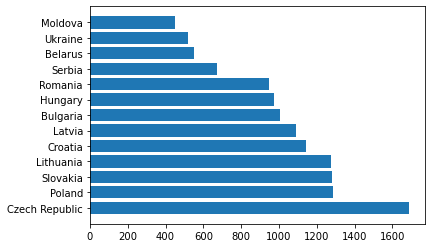

In [16]:
df_good_region_EUR = region_country_filter(None,df_good_region, 'EASTERN EUROPE')
avg_month_net_sal_EUR = avg_month_net_sal(df_good_region_EUR)

### Middle East

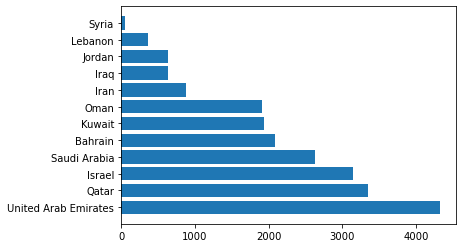

In [17]:
df_good_region_ME = region_country_filter(None,df_good_region, 'MIDDLE EAST')
avg_month_net_sal_ME = avg_month_net_sal(df_good_region_ME)

### Oceania

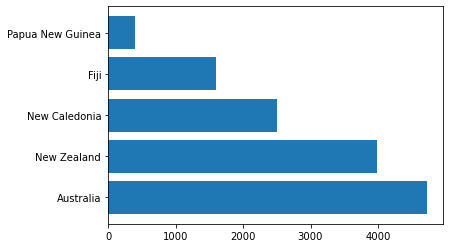

In [18]:
df_good_region_OC = region_country_filter(None,df_good_region, 'OCEANIA')
avg_month_net_sal_OC = avg_month_net_sal(df_good_region_OC)

### North America: Regression Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [20]:

df_good_NA = region_country_filter(None,df_good,'NORTH AMERICA')
df_good_NA_X = df_good_NA.drop(['country','city','x54','data_quality'], axis=1)
df_good_NA_X.set_index('region', inplace=True)
df_good_NA_X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x45,x46,x47,x48,x49,x50,x51,x52,x53,x55
region,,,,,,,,,,,,,,,,,,,,,
NORTH AMERICA,7.74,39.97,6.70,2.58,4.13,2.71,1.07,0.76,1.32,2.02,...,34.61,84.28,86.26,766.53,481.56,1480.77,850.84,2769.15,1695.80,10.57
NORTH AMERICA,25.00,100.00,10.00,7.20,10.00,5.38,2.72,2.32,1.26,4.11,...,57.42,95.29,145.62,3851.51,2347.10,7146.84,4279.34,14784.44,9531.27,5.40
NORTH AMERICA,20.00,88.59,10.00,8.00,8.00,4.94,2.70,2.30,1.14,3.80,...,40.75,93.93,133.00,2527.29,1973.00,4630.53,3599.83,9219.44,6135.43,5.18
NORTH AMERICA,20.00,80.00,10.00,6.00,6.50,4.83,2.29,1.99,0.84,3.18,...,37.81,86.95,95.95,1969.12,1452.61,3972.22,2450.00,3498.00,2389.59,5.59
NORTH AMERICA,20.00,100.00,10.00,6.00,8.00,4.59,2.19,2.03,1.15,3.17,...,40.36,79.44,105.77,2604.55,1910.42,4620.37,3175.00,6516.50,2973.53,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NORTH AMERICA,14.27,64.85,9.63,5.56,5.93,3.07,1.76,1.57,2.28,2.41,...,36.04,75.97,96.53,1168.55,1091.22,1951.69,1825.70,3547.18,3783.68,6.51
NORTH AMERICA,14.82,59.29,8.89,3.89,5.56,2.78,1.91,1.44,2.08,2.04,...,37.06,90.10,123.12,994.38,778.21,1686.12,1630.53,3869.17,2645.93,7.38
NORTH AMERICA,14.82,51.88,9.63,4.08,5.56,3.34,1.76,1.45,1.93,2.11,...,30.57,71.89,97.09,926.44,833.79,1247.60,1420.54,1930.60,2536.90,6.90


In [21]:
X_NA = df_good_NA_X

#The scaler below causes the adjusted R^2 to go above 1 so for now removed it
#scaler = StandardScaler()
#X_scaled_NA = scaler.fit_transform(X_NA) 

# y_americas is the Average Monthly Net Salary (After Tax) - USD
y_NA = df_good_NA['x54']
y_NA.shape

(128,)

In [22]:
'''
Explanatory variables (Features):

    # x48 - Apartment (1 bedroom) in City Centre
    # x49 - Apartment (1 bedroom) Outside of Centre
    # x55 - Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate

'''

X_NA.drop(['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30','x31','x32','x33','x34','x35','x36','x37','x38','x39','x40','x41','x42','x43','x44','x45','x46','x47','x50','x51','x52','x53'], axis = 1, inplace = True)

In [23]:
def min_max_mean(y):
    print(f'The mean Average Monthly Net Salary (USD) in North America: ${y.mean():.2f}')
    print(f'MAX Average Monthly Net Salary (USD) in North America: ${y.max()}')
    print(f'MIN Average Monthly Net Salary (USD) in North America: ${y.min()}')
min_max_mean(y_NA)

The mean Average Monthly Net Salary (USD) in North America: $3852.60
MAX Average Monthly Net Salary (USD) in North America: $7833.33
MIN Average Monthly Net Salary (USD) in North America: $443.49


In [24]:
# 20% of the data will be used to test against, 80% will be model on
X_train_NA, X_test_NA, y_train_NA, y_test_NA = train_test_split(X_NA, y_NA, test_size = 0.2, random_state =42)

#### North America: Create Linear Regression Model

In [25]:
def model_fit_predict(X_train, X_test, y_train):
    '''
    This functions is used to take the X_train, X_test and y_train inputs to train, and then predict using the model using the LinearRegression() class.
    '''
    LR = LinearRegression()
    # Train the model using X_train and y_train
    LR.fit(X_train, y_train)
    
    if X_train.shape[1] != X_test.shape[1]:
        raise ValueError("Training and testing arrays must have the same number of columns")

    # Use model to train on data    
    y_pred = LR.predict(X_test)

    return y_pred
    


In [26]:
y_pred_NA = model_fit_predict(X_train_NA, X_test_NA, y_train_NA)

### North America: Linear Regression Stats

In [27]:
# Function to return Ordinary Least Squares stats

def ols_stat(y_test, y_pred, X_test):
    
    # Calculate the R-squared value
    r_squared = r2_score(y_test, y_pred)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate the root mean squared error
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate the adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

    print(f'R-squared value: {r_squared:.2f}'), print(f'Mean squared error: {mse:.2f}'), print(f'Mean absolute error: {mae:.2f}'), print(f'Root mean squared error: {rmse:.2f}'), print(f'Adjusted R-squared: {adj_r_squared:.2f}')

In [28]:
ols_stat(y_test_NA,y_pred_NA, X_test_NA)

R-squared value: 0.61
Mean squared error: 887400.77
Mean absolute error: 760.89
Root mean squared error: 942.02
Adjusted R-squared: 0.56


# Continents left to model:
['ASIA', 'AFRICA', 'SOUTH AMERICA',
       'WESTERN EUROPE', 'MIDDLE EAST', 'OCEANIA', 'EASTERN EUROPE',
       'EUROPE']